In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv("hangqing_30.csv")
#data.shape
data = []
with open('hangqing_30.csv', 'r') as f:
    reader = csv.reader(f)
    print(type(reader))    
    for row in reader:
        data.append(row[1:])
data = data[1:]
print(data[0])

<class '_csv.reader'>
['2011-01-04 15:00:00', 'szse.002027', '23.044797552642', '23.258835920003996', '22.83075918528', '23.18748979755', '27388.0', '17724748.0', '']


In [3]:
# All 30 stocks
name_list = ['szse.002027', 'szse.300014', 'szse.002475', 'szse.000636', 'szse.002449', 'sse.600183', 'szse.000049', 
             'szse.002138', 'szse.300115', 'sse.600325', 'szse.000069', 'sse.600383', 'sse.600048', 'szse.001914', 
             'sse.601318', 'sse.600323', 'szse.002152', 'szse.000921', 'szse.002035', 'szse.000651', 'szse.002233', 
             'szse.002060', 'szse.002352', 'szse.002511', 'szse.002303', 'szse.002461', 'sse.600872', 'sse.600332', 
             'szse.000513', 'szse.000028']
# information item name
item_list = ['time', 'open', 'hith', 'low', 'close', 'volume', 'amount']
month_maxday_ping = [31,28,31,30,31,30,31,31,30,31,30,31]  # 平年
month_maxday_run = [31,29,31,30,31,30,31,31,30,31,30,31]   # 闰年

In [4]:
# 计算xxxx年xx月xx日对应是星期几
def CaculateWeek(year,month,day):
    year = int(year)
    year = year - int(year / 100) * 100    
    century = int(year/100)
    month = int(month)
    if month == 1 or month == 2:
        month = month + 12
        if year == 0:
            year = 99
            century = century - 1
        else:
            year = year - 1
    day =int(day)
    week = year + int(year/4) + int(century/4) - 2 * century + int(26 * (month + 1)/10) + day - 1
    if week < 0:
        weekDay = (week % 7 + 7) % 7
    else:
        weekDay = week % 7
    return weekDay
# print(CaculateWeek(2020,11,1))  # 星期天是0

In [5]:
# 取具体某天的所有公司的数据
def Get_Onedaydata(data_all, time):
    data_oneday = []
    for i in range(len(data_all)):
        # print(rows)
        if (time in data_all[i][0]):
            data_oneday.append(data_all[i])
    return data_oneday

In [6]:
# 计算上周增长最快的十支股票
def takeSecond(elem):
    return elem[1]
def Calculate_Growth(last_data, current_data):
    growth = []
    for name in name_list:
        for item in last_data:
            if (name in item[1]):
                last_close = float(item[5])
        for item in current_data:
            if (name in item[1]):
                current_close = float(item[5])  
        growth_name = (current_close-last_close)/last_close
        growth.append((name,growth_name))
    growth.sort(key=takeSecond,reverse=True)
    return growth

In [7]:
# 计算上周的收益
def Calculate_Income(last_data, current_data, selection_last):
    income_rate = 0
    income_rate_list = []
    for select_i in selection_last:
        for item in last_data:
            if (select_i[0] in item[1]):
                last_close = float(item[5])
        for item in current_data:
            if (select_i[0] in item[1]):
                current_close = float(item[5])
        income_select_i = (current_close-last_close)/last_close*10
        income_rate_list.append(income_select_i)
        income_rate = income_rate + income_select_i
    return income_rate, income_rate_list

In [8]:
# 主程序
num = 0
income_allday = []
for y in range(2011,2021):
    if (y == 2020):
        month_max = 10
    else:
        month_max = 12
    for m in range(1,month_max+1):
        if (y%4 == 0):
            day_max = month_maxday_run[m-1]
        else:
            day_max = month_maxday_ping[m-1]
        for d in range(1,day_max+1):
            if (CaculateWeek(y,m,d) == 1):
                time = str(y)+'-'+str(m+100)[1:3]+'-'+str(d+100)[1:3]   # 日期
                current_data_oneday = Get_Onedaydata(data, time)        # 拿当前日期的数据
                if (len(current_data_oneday)==30):
                    # 初始化
                    if (num == 0):
                        last_data_oneday = current_data_oneday
                        num = num+1
                    elif (num == 1):
                        growth = Calculate_Growth(last_data_oneday,current_data_oneday) 
                        selection_last = growth[0:9]
                        last_data_oneday = current_data_oneday
                        num = num+1
                    # 从第三周开始计算收益率
                    else:
                        # 计算并选择上周增长最快的股票
                        growth = Calculate_Growth(last_data_oneday,current_data_oneday) 
                        selection_current = growth[0:9]
                    
                        # 计算上周的收益
                        income_rate, income_rate_list = Calculate_Income(last_data_oneday,
                                                                         current_data_oneday, selection_last)
                        income_allday.append(income_rate)
                        
                        # 重置
                        selection_last = selection_current
                        last_data_oneday = current_data_oneday
                        num = num+1
                    
print(income_allday)      

[-0.8539349811760303, 2.621922926823902, -2.8965790633480983, -2.882330098271388, -8.260629059491311, -4.421220060316106, -2.8019075936157996, 15.982681752485624, 0.9353378156414759, 0.7867789554031175, -7.121541784699905, -4.976870467901756, -3.192356268375932, -2.481265748144713, -5.762686039796713, 1.616957851834366, -4.673499327335253, 7.975885756552092, 0.6082050301115427, 3.027528509632208, 2.9304107931221037, 0.7599457921404329, 0.7328216719087159, -1.2012705006083135, -3.2717368665260045, 5.917765071140151, -0.34875260879032083, -1.4028920515481056, -0.05995496541463152, 0.03288074497298643, 2.1327380088256063, -4.459388907600053, -5.106173657379792, 0.510439136282862, 4.074403456646702, 6.353464724476333, -3.8252142547030283, 5.1840413775541, -2.7352127273822635, -6.398070992007535, 5.985017764354639, 1.073401883127354, 0.9023868273711955, 4.296405214713687, 1.120809100175295, 4.364150104396488, 3.1353209480949764, -1.0049615726748258, 0.4405660001121132, 2.7534072931424776, 0

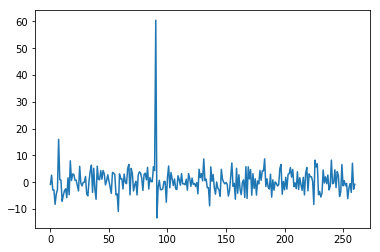

In [9]:
plt.plot(income_allday)